In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("laptop_data.csv", index_col=0)

In [3]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [6]:
df.duplicated().sum()

np.int64(29)

In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#### preprocessing

In [8]:
df['Ram']=df['Ram'].str.replace('GB',' ')
df['Weight']=df['Weight'].str.replace('kg',' ')

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 112.0+ KB


#### Data Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\rosha\AppData\Local\Temp\ipykernel_11564\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

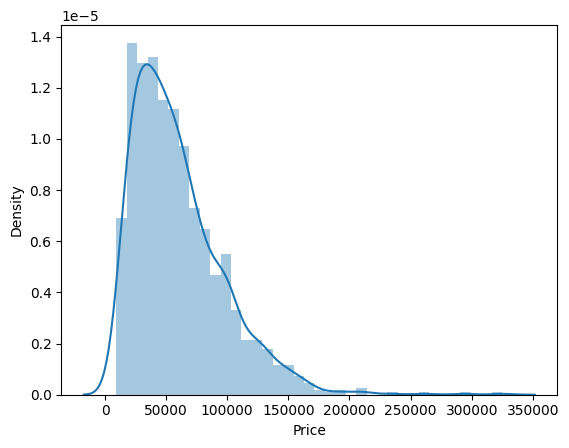

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

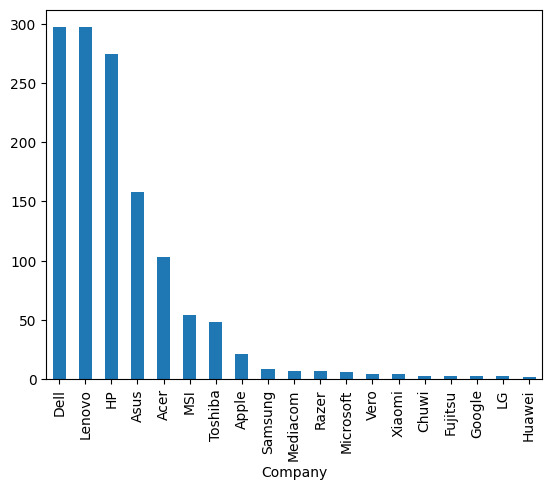

In [14]:
df['Company'].value_counts().plot(kind='bar')

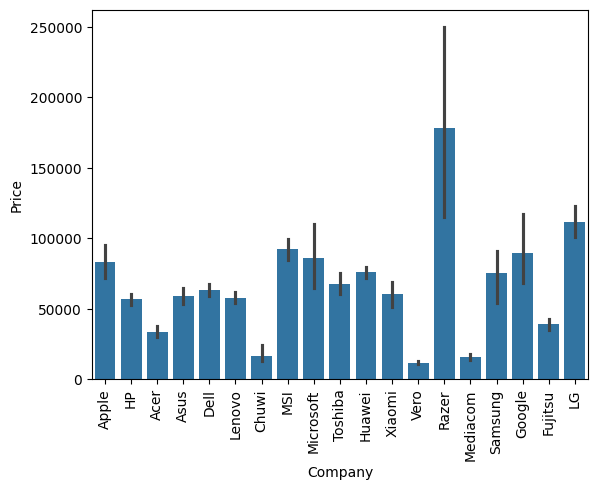

In [15]:
sns.barplot(x=df['Company'] ,y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

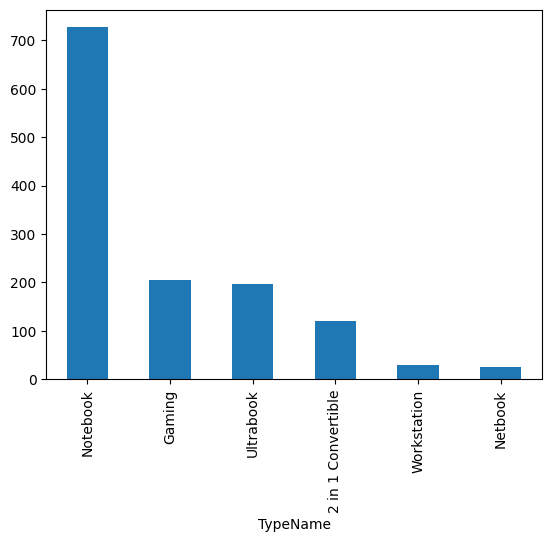

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

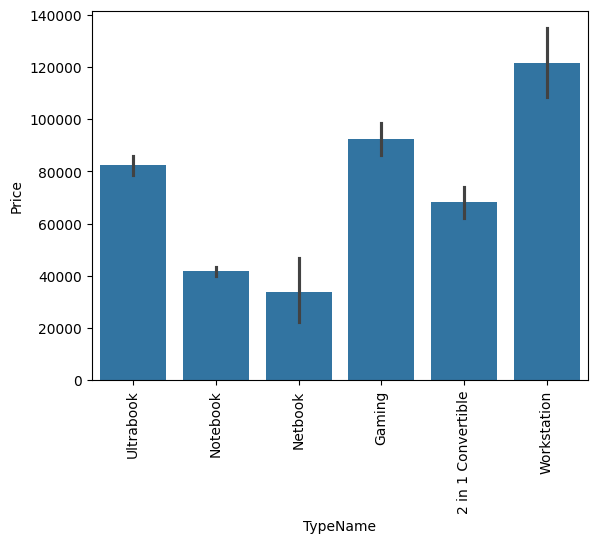

In [17]:
sns.barplot(x=df['TypeName'] ,y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

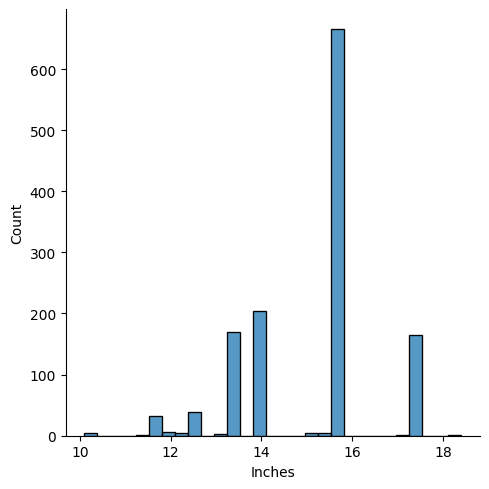

In [18]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

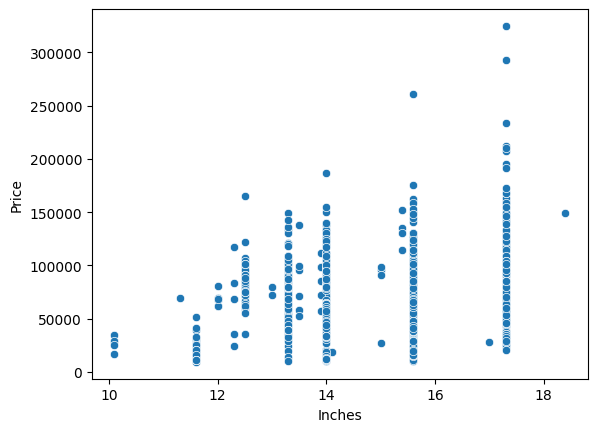

In [19]:
sns.scatterplot(x=df['Inches'] , y=df['Price'])

In [20]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [21]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [23]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
281,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,22803.84,0
249,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,512GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,108691.20,0
888,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,15824.16,0
617,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.84,74005.92,0
704,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.90,23976.00,0
435,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,90309.60,0
40,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.00,20725.92,0
424,Dell,Gaming,17.3,IPS Panel 2560x1440,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,149130.72,0
906,HP,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,79014.24,0
684,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19,79866.72,1


In [24]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

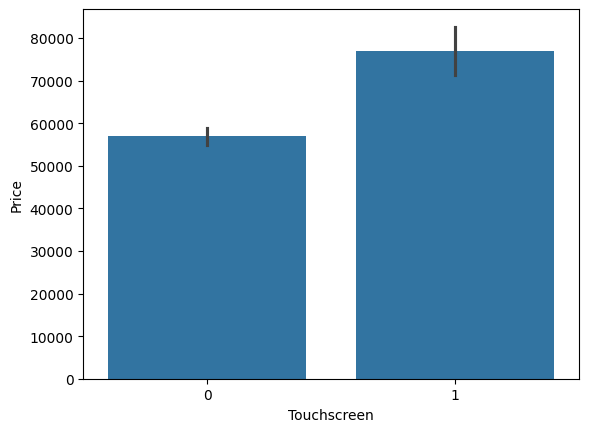

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [26]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

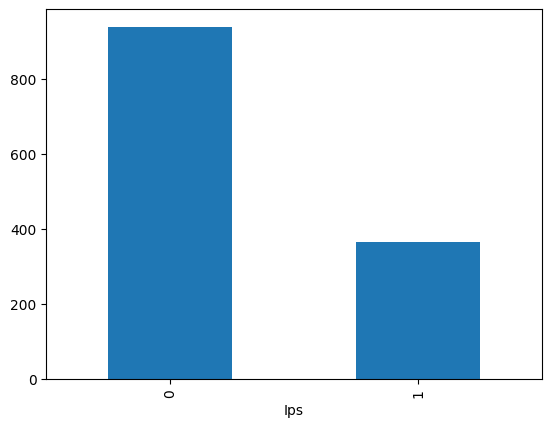

In [28]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

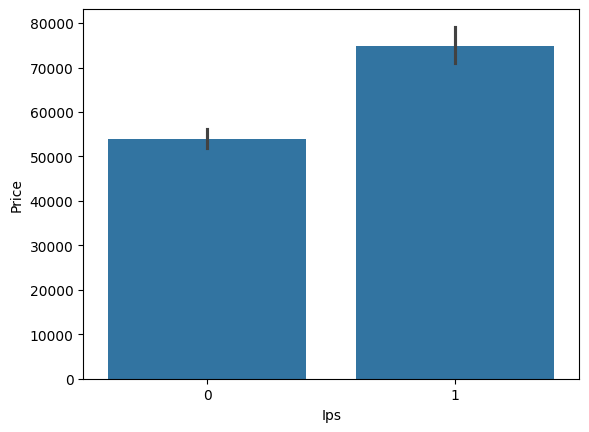

In [29]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [30]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [33]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [34]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
962,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,53759.520,0,0,1920,1080
1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.720,0,0,1920,1080
288,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,62817.120,0,1,1920,1080
887,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,72988.272,0,0,1920,1080
948,Dell,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,35111.520,0,0,1600,900
400,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.20,16303.680,0,0,1366,768
639,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127818.720,1,0,3840,2160
854,Asus,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.360,0,1,1920,1080
295,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,69210.720,0,1,1920,1080
945,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,AMD FX 8800P 2.1GHz,16,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.50,53226.720,0,1,1920,1080


In [35]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 152.7+ KB


In [37]:
df.select_dtypes(include='number').corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [38]:
df['ppi']=(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [39]:
df.select_dtypes(include='number').corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [40]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [41]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [42]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [43]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
404,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,119826.720,0,0,127.335675
794,Apple,Ultrabook,Intel Core M 1.2GHz,8,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,62071.200,0,1,226.415547
597,Lenovo,Notebook,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.70,78534.720,0,1,157.350512
986,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,42943.680,0,0,141.211998
745,Acer,Notebook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.68,17582.400,0,0,111.935204
901,Asus,Gaming,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.120,0,1,127.335675
613,Dell,Notebook,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.25,19127.520,0,0,100.454670
1105,Dell,Ultrabook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.50,75289.968,0,0,125.367428
915,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.44,46939.680,0,0,165.632118
927,HP,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.31,62071.200,0,0,141.211998


In [44]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [45]:
df['Cpu name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [47]:
def fetch_processor(text):
    if text.startswith('Intel Core i7'):
        return 'Intel Core i7'
    elif text.startswith('Intel Core i5'):
        return 'Intel Core i5'
    elif text.startswith('Intel Core i3'):
        return 'Intel Core i3'
    elif text.split()[0]=='Other Intel Processor':
        return 'Other Intel Processor' 
    else:
        return 'AMD Processor'

In [48]:
df['Cpu Brand']=df['Cpu'].apply(fetch_processor)

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

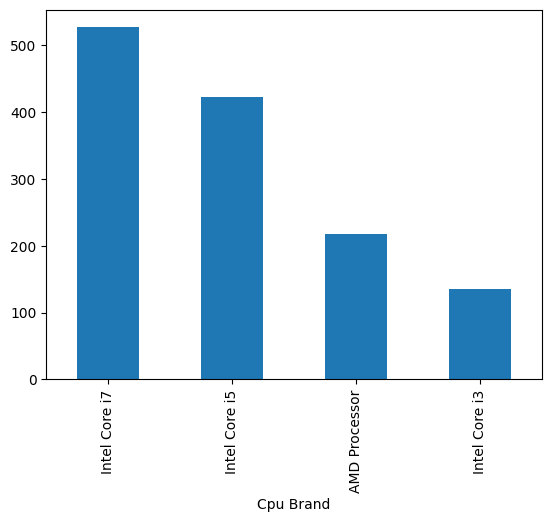

In [50]:
df['Cpu Brand'].value_counts().plot(kind='bar')

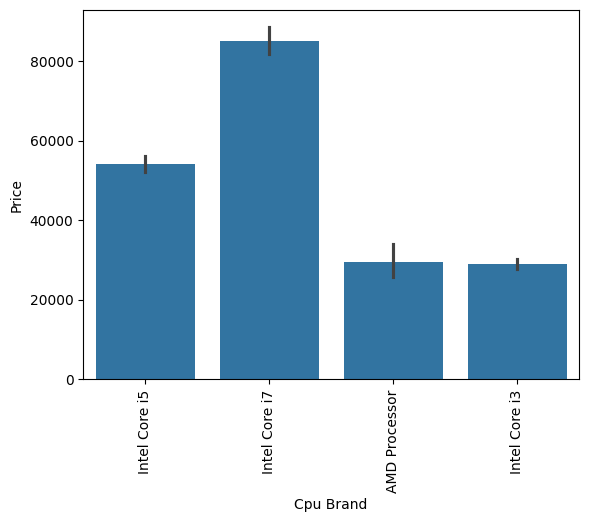

In [51]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.drop(columns=['Cpu','Cpu name'],inplace=True)

In [53]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [54]:
df['Ram'].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

<Axes: xlabel='Ram'>

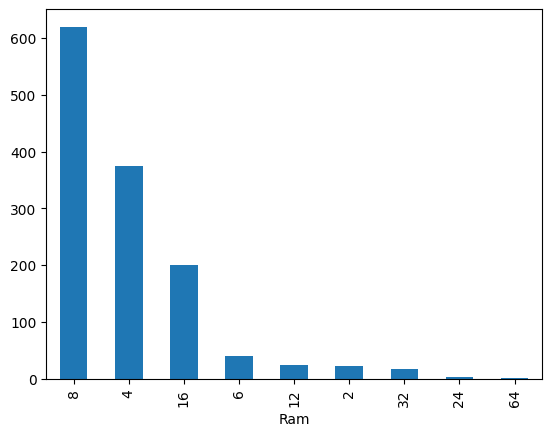

In [55]:
df['Ram'].value_counts().plot(kind='bar')

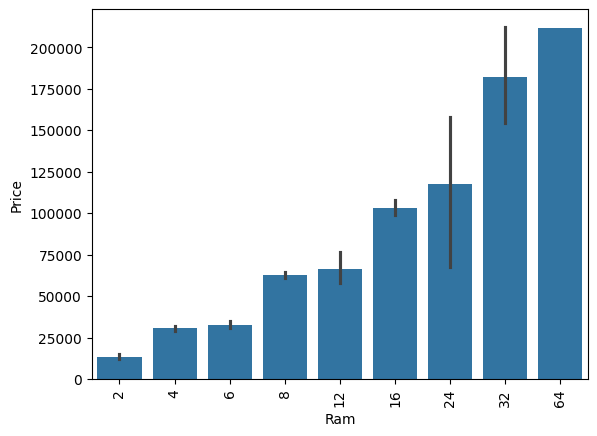

In [56]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [58]:

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=False)
df['Memory'] = df['Memory'].str.replace('TB', '000', regex=False)

df['Memory'] = df['Memory'].str.replace(' +', '+', regex=False)

new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("0").str.strip()

df["Layer1HDD"] = df["first"].str.contains("HDD").astype(int)
df["Layer1SSD"] = df["first"].str.contains("SSD").astype(int)
df["Layer1Hybrid"] = df["first"].str.contains("Hybrid").astype(int)
df["Layer1Flash_Storage"] = df["first"].str.contains("Flash Storage").astype(int)

df["Layer2HDD"] = df["second"].str.contains("HDD").astype(int)
df["Layer2SSD"] = df["second"].str.contains("SSD").astype(int)
df["Layer2Hybrid"] = df["second"].str.contains("Hybrid").astype(int)
df["Layer2Flash_Storage"] = df["second"].str.contains("Flash Storage").astype(int)

df["first"] = df["first"].str.extract('(\d+)').fillna(0).astype(int)
df["second"] = df["second"].str.extract('(\d+)').fillna(0).astype(int)

df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]

df.drop(columns=[
    'first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
    'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
    'Layer2Flash_Storage'
], inplace=True)


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rosha\AppData\Local\Temp\ipykernel_11564\3691199769.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\rosha\AppData\Local\Temp\ipykernel_11564\3691199769.py:21: SyntaxWarning: invalid escape sequence '\d'
  df["first"] = df["first"].str.extract('(\d+)').fillna(0).astype(int)
C:\Users\rosha\AppData\Local\Temp\ipykernel_11564\3691199769.py:22: SyntaxWarning: invalid escape sequence '\d'
  df["second"] = df["second"].str.extract('(\d+)').fillna(0).astype(int)


In [59]:
df.drop(columns=['Memory'],inplace=True)

In [60]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [61]:
df.select_dtypes(include='number').corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [62]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [64]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [65]:
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [66]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [67]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [68]:
df=df[df['Gpu brand'] != 'ARM']

In [69]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

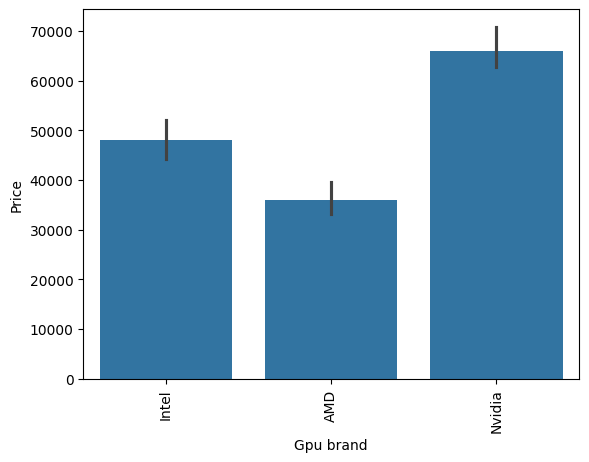

In [70]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
df.drop(columns=['Gpu'],inplace=True)

In [72]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [73]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

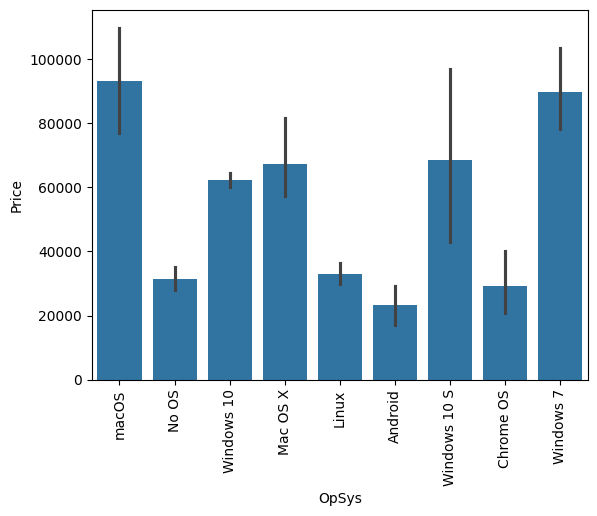

In [74]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [76]:
df['os'] = df['OpSys'].apply(cat_os)

In [77]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [78]:
df.drop(columns=['OpSys'],inplace=True)

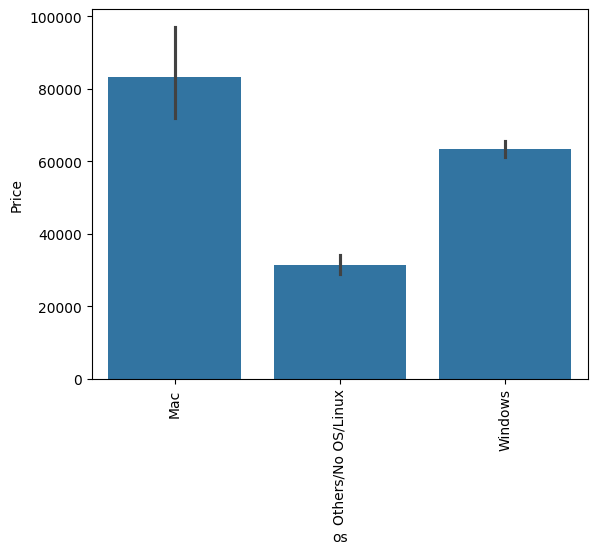

In [79]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\rosha\AppData\Local\Temp\ipykernel_11564\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

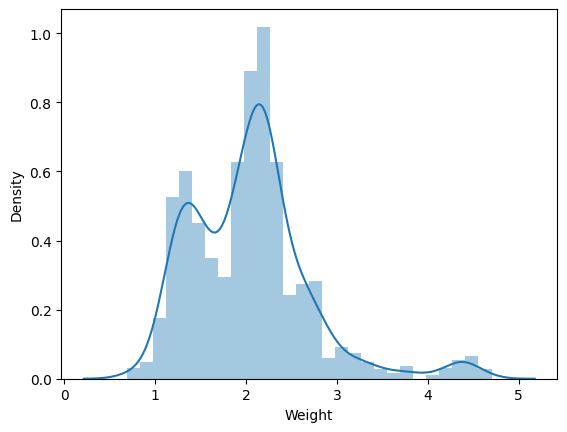

In [80]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

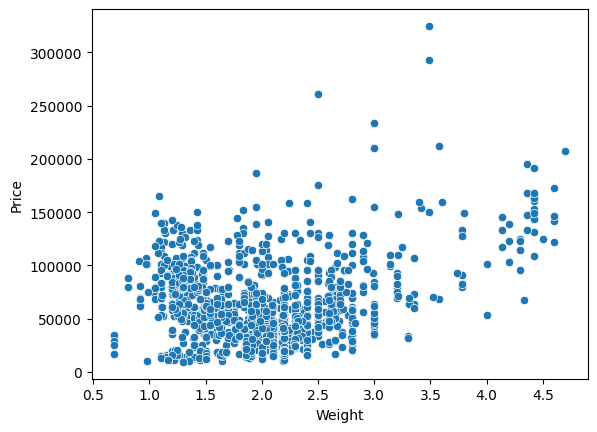

In [81]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [82]:
df.select_dtypes(include='number').corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

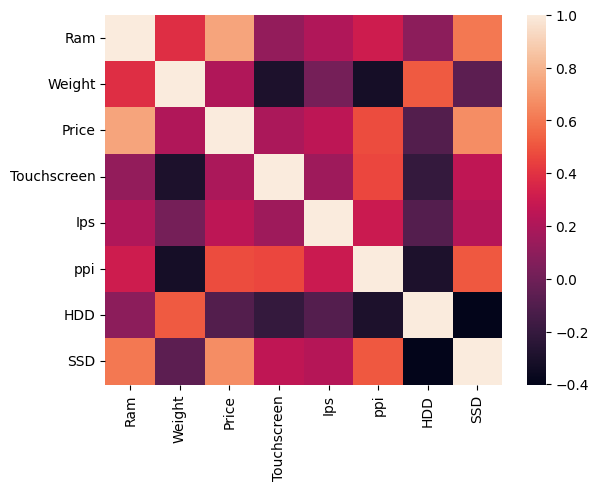

In [83]:
sns.heatmap(df.select_dtypes(include='number').corr())

C:\Users\rosha\AppData\Local\Temp\ipykernel_11564\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

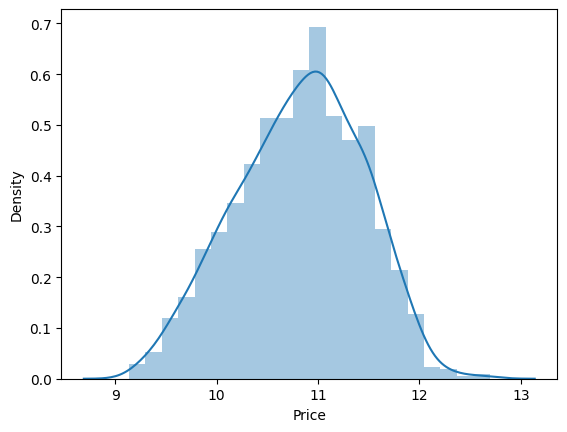

In [84]:
sns.distplot(np.log(df['Price']))

In [85]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [86]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,AMD Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [87]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [90]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,AMD Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [92]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

#### RandomForestRegressor

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.891761380575325
MAE 0.15563770682603117


#### GradientBoosting

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8951328293544464
MAE 0.1526842896897665


In [100]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [101]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,AMD Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [102]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,AMD Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
